In [1]:
year=2019
month=7

In [2]:
import pandas as pd
import sys
sys.path.append('../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month}", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print(f"2019年{month}月全国招收{career}{head_count}人。2019年{month}月全国{career}平均工资{salary_average:.0f}元，工资中位数{q[1]:.0f}元，其中95%的人的工资介于{q[0]:.0f}元到{q[2]:.0f}元。\r\n")
    
get_summary(data, '程序员')

2019年7月全国招收程序员225695人。2019年7月全国程序员平均工资13609元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。



In [8]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [9]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,22583,5250,20833,50000,7831,3.47%
0,算法工程师,19587,5000,17500,45000,18348,8.13%
1,一般程序员,12709,3750,12000,30000,199123,88.23%
3,爬虫工程师,12300,2750,11500,35000,360,0.16%
4,生物信息工程师,9879,7000,9000,14000,33,0.01%


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17638,3750,15000,45000,21211,9.40%
上海,16631,5250,15000,37500,36182,16.03%
广东,14715,4500,12500,37045,60020,26.59%
浙江,14035,3250,12500,32500,13997,6.20%
四川,12259,3500,11500,31250,9438,4.18%
江苏,12121,3750,11500,27500,23400,10.37%
湖北,11687,4086,10933,26000,11529,5.11%
陕西,11122,3998,10500,22500,5699,2.53%
湖南,10881,3840,10000,24000,4892,2.17%
福建,10195,3705,10000,20000,4540,2.01%


In [11]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"2019年{month}月{row[0]}招收{career}{row[5]}人。2019年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [12]:
describe(data_city,'程序员')

2019年7月北京招收程序员21211人。2019年7月北京程序员平均工资17638元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年7月上海招收程序员36182人。2019年7月上海程序员平均工资16631元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年7月广东招收程序员60020人。2019年7月广东程序员平均工资14715元，工资中位数12500元，其中95%的人的工资介于4500元到37045元。

2019年7月浙江招收程序员13997人。2019年7月浙江程序员平均工资14035元，工资中位数12500元，其中95%的人的工资介于3250元到32500元。

2019年7月四川招收程序员9438人。2019年7月四川程序员平均工资12259元，工资中位数11500元，其中95%的人的工资介于3500元到31250元。

2019年7月江苏招收程序员23400人。2019年7月江苏程序员平均工资12121元，工资中位数11500元，其中95%的人的工资介于3750元到27500元。

2019年7月湖北招收程序员11529人。2019年7月湖北程序员平均工资11687元，工资中位数10933元，其中95%的人的工资介于4086元到26000元。

2019年7月陕西招收程序员5699人。2019年7月陕西程序员平均工资11122元，工资中位数10500元，其中95%的人的工资介于3998元到22500元。

2019年7月湖南招收程序员4892人。2019年7月湖南程序员平均工资10881元，工资中位数10000元，其中95%的人的工资介于3840元到24000元。

2019年7月福建招收程序员4540人。2019年7月福建程序员平均工资10195元，工资中位数10000元，其中95%的人的工资介于3705元到20000元。

2019年7月重庆招收程序员2981人。2019年7月重庆程序员平均工资10117元，工资中位数9000元，其中95%的人的工资介于4000元到20000元。

2019年7月天津招收程序员1715人。2019年7月天津程序员平均工资10079元，工资中位数9000元，其中95%的人的工资介于3750元到22500元。

2019年7月辽宁招收程

In [13]:
data_location = pd.read_csv('../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


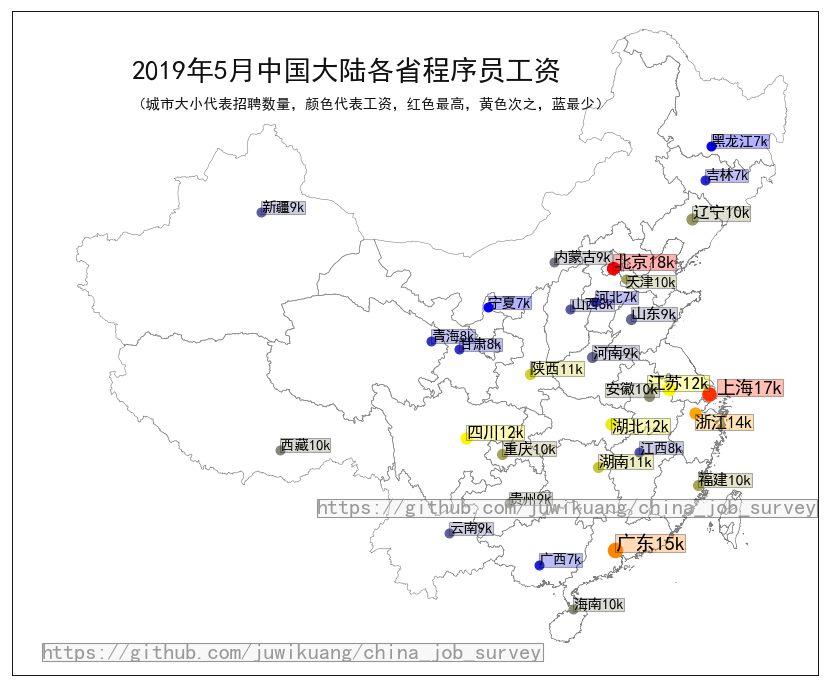

In [16]:
draw_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [17]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年7月全国招收算法工程师18348人。2019年7月全国算法工程师平均工资19587元，工资中位数17500元，其中95%的人的工资介于5000元到45000元。



In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,23923,5250,22500,50000,2543,13.86%
上海,22994,5242,22500,45833,3494,19.04%
海南,20833,12500,15000,35000,18,0.10%
广东,20755,5644,18833,45000,4689,25.56%
浙江,19664,3750,17500,45437,1315,7.17%
内蒙古,19625,5250,19625,22500,6,0.03%
江苏,17559,6361,16352,37500,2030,11.06%
四川,15808,5250,14512,31250,854,4.65%
江西,15378,6500,13250,37500,37,0.20%
湖北,15068,3866,15000,27500,939,5.12%


In [19]:
describe(data_city_algorithm,'算法工程师')

2019年7月北京招收算法工程师2543人。2019年7月北京算法工程师平均工资23923元，工资中位数22500元，其中95%的人的工资介于5250元到50000元。

2019年7月上海招收算法工程师3494人。2019年7月上海算法工程师平均工资22994元，工资中位数22500元，其中95%的人的工资介于5242元到45833元。

2019年7月海南招收算法工程师18人。2019年7月海南算法工程师平均工资20833元，工资中位数15000元，其中95%的人的工资介于12500元到35000元。

2019年7月广东招收算法工程师4689人。2019年7月广东算法工程师平均工资20755元，工资中位数18833元，其中95%的人的工资介于5644元到45000元。

2019年7月浙江招收算法工程师1315人。2019年7月浙江算法工程师平均工资19664元，工资中位数17500元，其中95%的人的工资介于3750元到45437元。

2019年7月内蒙古招收算法工程师6人。2019年7月内蒙古算法工程师平均工资19625元，工资中位数19625元，其中95%的人的工资介于5250元到22500元。

2019年7月江苏招收算法工程师2030人。2019年7月江苏算法工程师平均工资17559元，工资中位数16352元，其中95%的人的工资介于6361元到37500元。

2019年7月四川招收算法工程师854人。2019年7月四川算法工程师平均工资15808元，工资中位数14512元，其中95%的人的工资介于5250元到31250元。

2019年7月江西招收算法工程师37人。2019年7月江西算法工程师平均工资15378元，工资中位数13250元，其中95%的人的工资介于6500元到37500元。

2019年7月湖北招收算法工程师939人。2019年7月湖北算法工程师平均工资15068元，工资中位数15000元，其中95%的人的工资介于3866元到27500元。

2019年7月青海招收算法工程师1人。2019年7月青海算法工程师平均工资14583元，工资中位数14583元，其中95%的人的工资介于14583元到14583元。

2019年7月湖南招收算法工程师299人。2019年7月湖南算法工程师平均工资14266元，工资中位数12500元，其中95

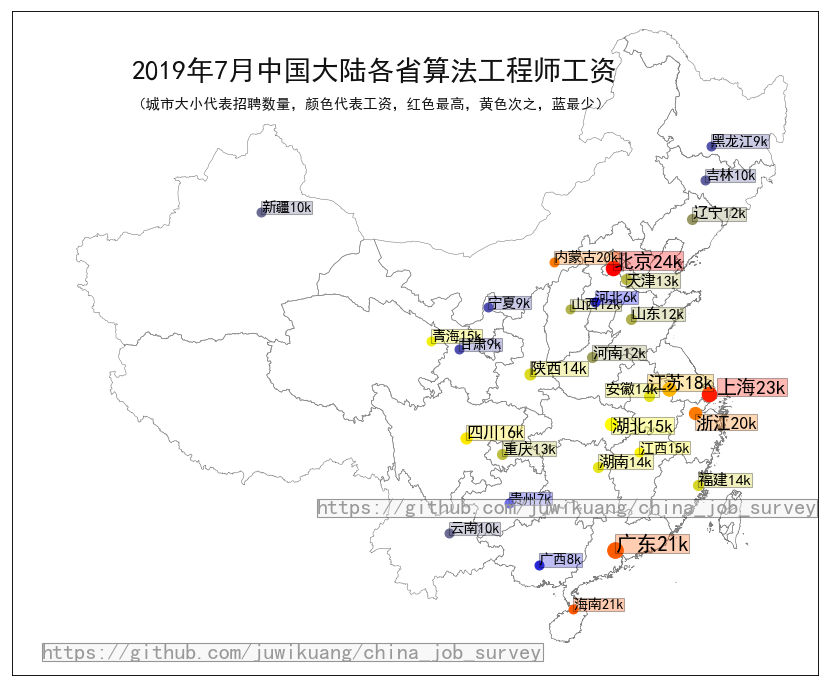

In [20]:
draw_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [21]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年7月全国招收系统架构师7831人。2019年7月全国系统架构师平均工资22583元，工资中位数20833元，其中95%的人的工资介于5250元到50000元。



In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,30972,4500,30000,60000,1069,13.65%
上海,25784,9000,24000,50000,1587,20.27%
广东,23270,5250,22500,50000,2242,28.63%
浙江,22806,4943,22500,45000,475,6.07%
天津,22686,5219,11500,60000,55,0.70%
四川,19888,5591,17800,44862,231,2.95%
江苏,18317,5250,17500,36573,635,8.11%
河北,17660,7000,16000,29166,25,0.32%
陕西,16928,6533,17375,39750,184,2.35%
湖北,16871,4950,15750,34183,318,4.06%


In [23]:
describe(data_city_architect,'系统架构师')

2019年7月北京招收系统架构师1069人。2019年7月北京系统架构师平均工资30972元，工资中位数30000元，其中95%的人的工资介于4500元到60000元。

2019年7月上海招收系统架构师1587人。2019年7月上海系统架构师平均工资25784元，工资中位数24000元，其中95%的人的工资介于9000元到50000元。

2019年7月广东招收系统架构师2242人。2019年7月广东系统架构师平均工资23270元，工资中位数22500元，其中95%的人的工资介于5250元到50000元。

2019年7月浙江招收系统架构师475人。2019年7月浙江系统架构师平均工资22806元，工资中位数22500元，其中95%的人的工资介于4943元到45000元。

2019年7月天津招收系统架构师55人。2019年7月天津系统架构师平均工资22686元，工资中位数11500元，其中95%的人的工资介于5219元到60000元。

2019年7月四川招收系统架构师231人。2019年7月四川系统架构师平均工资19888元，工资中位数17800元，其中95%的人的工资介于5591元到44862元。

2019年7月江苏招收系统架构师635人。2019年7月江苏系统架构师平均工资18317元，工资中位数17500元，其中95%的人的工资介于5250元到36573元。

2019年7月河北招收系统架构师25人。2019年7月河北系统架构师平均工资17660元，工资中位数16000元，其中95%的人的工资介于7000元到29166元。

2019年7月陕西招收系统架构师184人。2019年7月陕西系统架构师平均工资16928元，工资中位数17375元，其中95%的人的工资介于6533元到39750元。

2019年7月湖北招收系统架构师318人。2019年7月湖北系统架构师平均工资16871元，工资中位数15750元，其中95%的人的工资介于4950元到34183元。

2019年7月辽宁招收系统架构师191人。2019年7月辽宁系统架构师平均工资16178元，工资中位数15000元，其中95%的人的工资介于3750元到32362元。

2019年7月山西招收系统架构师19人。2019年7月山西系统架构师平均工资16158元，工资中位数16786元，其中95%的人

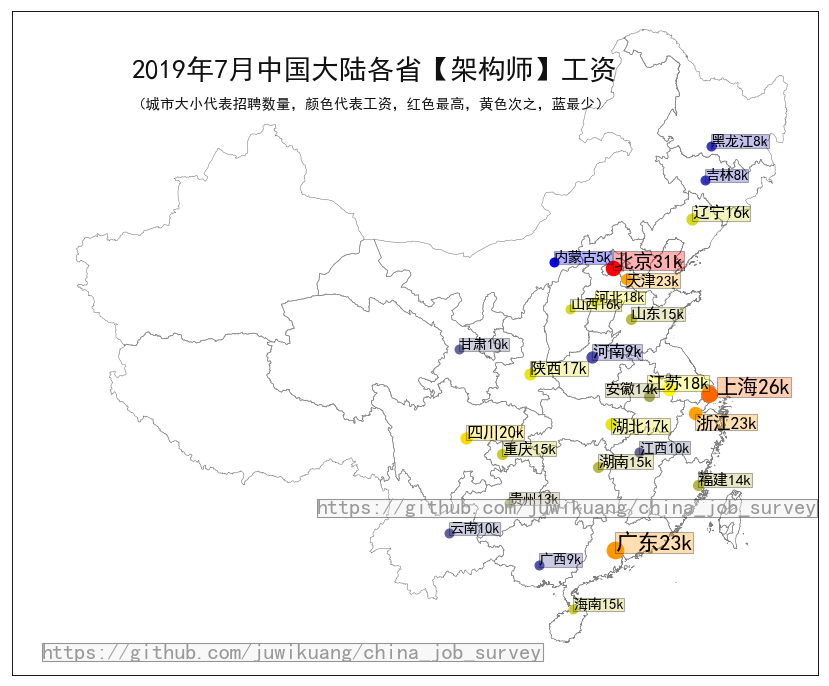

In [24]:
draw_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [25]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年7月全国招收生物信息工程师33人。2019年7月全国生物信息工程师平均工资9879元，工资中位数9000元，其中95%的人的工资介于7000元到14000元。



In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,12500,12500,12500,12500,2,6.06%
浙江,12000,11500,12000,12500,2,6.06%
吉林,11500,11500,11500,11500,2,6.06%
广东,9885,7000,8800,14000,13,39.39%
江苏,9875,9000,9875,12500,4,12.12%
上海,9800,8000,9800,12500,5,15.15%
湖北,9000,9000,9000,9000,1,3.03%
江西,7000,7000,7000,7000,1,3.03%
广西,7000,7000,7000,7000,3,9.09%


In [27]:
describe(data_bio,'生物信息工程师')

2019年7月北京招收生物信息工程师2人。2019年7月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年7月浙江招收生物信息工程师2人。2019年7月浙江生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年7月吉林招收生物信息工程师2人。2019年7月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年7月广东招收生物信息工程师13人。2019年7月广东生物信息工程师平均工资9885元，工资中位数8800元，其中95%的人的工资介于7000元到14000元。

2019年7月江苏招收生物信息工程师4人。2019年7月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2019年7月上海招收生物信息工程师5人。2019年7月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年7月湖北招收生物信息工程师1人。2019年7月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年7月江西招收生物信息工程师1人。2019年7月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年7月广西招收生物信息工程师3人。2019年7月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



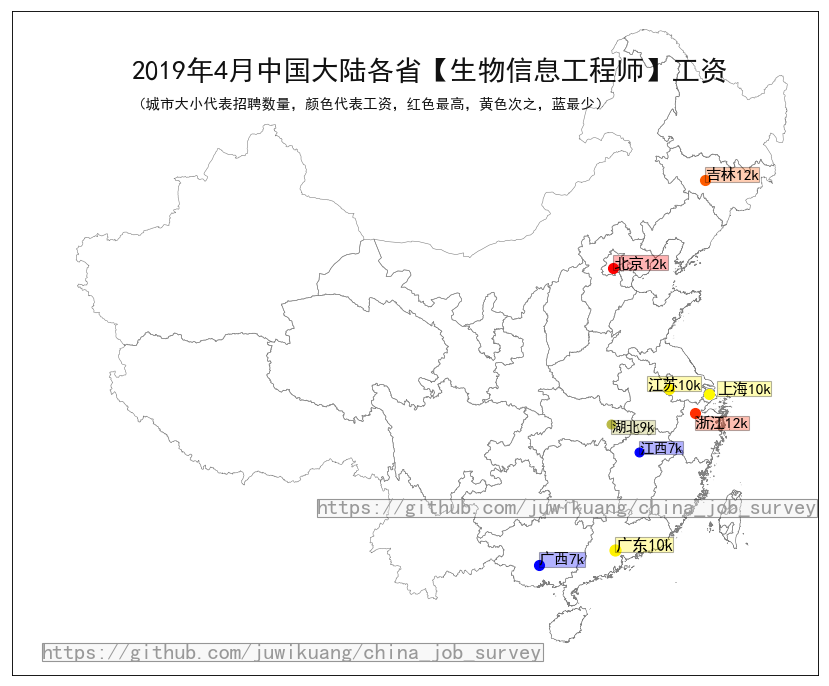

In [28]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [29]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年7月全国招收爬虫工程师360人。2019年7月全国爬虫工程师平均工资12300元，工资中位数11500元，其中95%的人的工资介于2750元到35000元。



In [30]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,16662,1750,12500,37146,37,10.28%
上海,13727,5022,12500,31531,77,21.39%
浙江,13385,9000,12000,22500,13,3.61%
江苏,13017,8000,12500,20000,29,8.06%
广东,12530,4012,11125,35937,115,31.94%
湖北,10449,8000,10687,12500,13,3.61%
湖南,9037,7000,8846,11500,27,7.50%
河南,6083,5000,5194,9000,12,3.33%
四川,5531,2250,5531,11500,16,4.44%


In [31]:
describe(data_spider, '爬虫工程师')

2019年7月北京招收爬虫工程师37人。2019年7月北京爬虫工程师平均工资16662元，工资中位数12500元，其中95%的人的工资介于1750元到37146元。

2019年7月上海招收爬虫工程师77人。2019年7月上海爬虫工程师平均工资13727元，工资中位数12500元，其中95%的人的工资介于5022元到31531元。

2019年7月浙江招收爬虫工程师13人。2019年7月浙江爬虫工程师平均工资13385元，工资中位数12000元，其中95%的人的工资介于9000元到22500元。

2019年7月江苏招收爬虫工程师29人。2019年7月江苏爬虫工程师平均工资13017元，工资中位数12500元，其中95%的人的工资介于8000元到20000元。

2019年7月广东招收爬虫工程师115人。2019年7月广东爬虫工程师平均工资12530元，工资中位数11125元，其中95%的人的工资介于4012元到35937元。

2019年7月湖北招收爬虫工程师13人。2019年7月湖北爬虫工程师平均工资10449元，工资中位数10687元，其中95%的人的工资介于8000元到12500元。

2019年7月湖南招收爬虫工程师27人。2019年7月湖南爬虫工程师平均工资9037元，工资中位数8846元，其中95%的人的工资介于7000元到11500元。

2019年7月河南招收爬虫工程师12人。2019年7月河南爬虫工程师平均工资6083元，工资中位数5194元，其中95%的人的工资介于5000元到9000元。

2019年7月四川招收爬虫工程师16人。2019年7月四川爬虫工程师平均工资5531元，工资中位数5531元，其中95%的人的工资介于2250元到11500元。



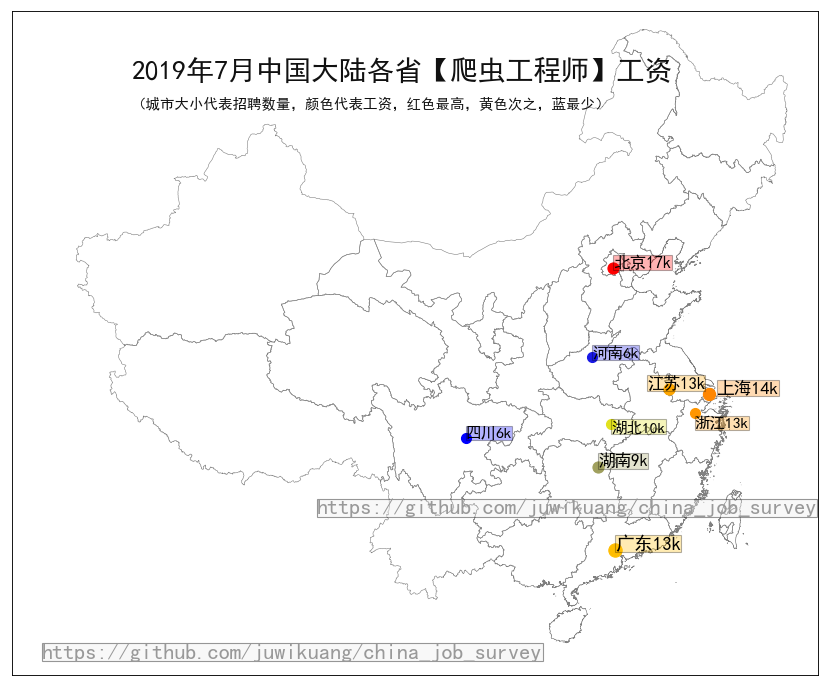

In [32]:
draw_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [33]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年7月全国招收Java程序员104246人。2019年7月全国Java程序员平均工资13503元，工资中位数12500元，其中95%的人的工资介于3750元到32500元。



In [34]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,16929,5250,15000,37500,15920,15.27%
北京,16403,4500,14000,37500,10107,9.70%
广东,14819,4500,12500,35000,27068,25.97%
浙江,14385,3000,12500,30000,6762,6.49%
江苏,12000,3750,11500,25000,10747,10.31%
四川,11758,2500,11500,27500,4017,3.85%
湖北,11410,4641,10500,25730,4599,4.41%
陕西,11039,3225,11000,22500,2623,2.52%
贵州,10936,5000,11500,16770,285,0.27%
湖南,10592,3750,10000,20000,2380,2.28%


In [35]:
describe(data_java, 'Java程序员')

2019年7月上海招收Java程序员15920人。2019年7月上海Java程序员平均工资16929元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年7月北京招收Java程序员10107人。2019年7月北京Java程序员平均工资16403元，工资中位数14000元，其中95%的人的工资介于4500元到37500元。

2019年7月广东招收Java程序员27068人。2019年7月广东Java程序员平均工资14819元，工资中位数12500元，其中95%的人的工资介于4500元到35000元。

2019年7月浙江招收Java程序员6762人。2019年7月浙江Java程序员平均工资14385元，工资中位数12500元，其中95%的人的工资介于3000元到30000元。

2019年7月江苏招收Java程序员10747人。2019年7月江苏Java程序员平均工资12000元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2019年7月四川招收Java程序员4017人。2019年7月四川Java程序员平均工资11758元，工资中位数11500元，其中95%的人的工资介于2500元到27500元。

2019年7月湖北招收Java程序员4599人。2019年7月湖北Java程序员平均工资11410元，工资中位数10500元，其中95%的人的工资介于4641元到25730元。

2019年7月陕西招收Java程序员2623人。2019年7月陕西Java程序员平均工资11039元，工资中位数11000元，其中95%的人的工资介于3225元到22500元。

2019年7月贵州招收Java程序员285人。2019年7月贵州Java程序员平均工资10936元，工资中位数11500元，其中95%的人的工资介于5000元到16770元。

2019年7月湖南招收Java程序员2380人。2019年7月湖南Java程序员平均工资10592元，工资中位数10000元，其中95%的人的工资介于3750元到20000元。

2019年7月天津招收Java程序员824人。2019年7月天津Java程序员平均工资10491元，工资中位数9000元，其中95%的人的工资介于4500元到20000元。

2019年7月辽宁

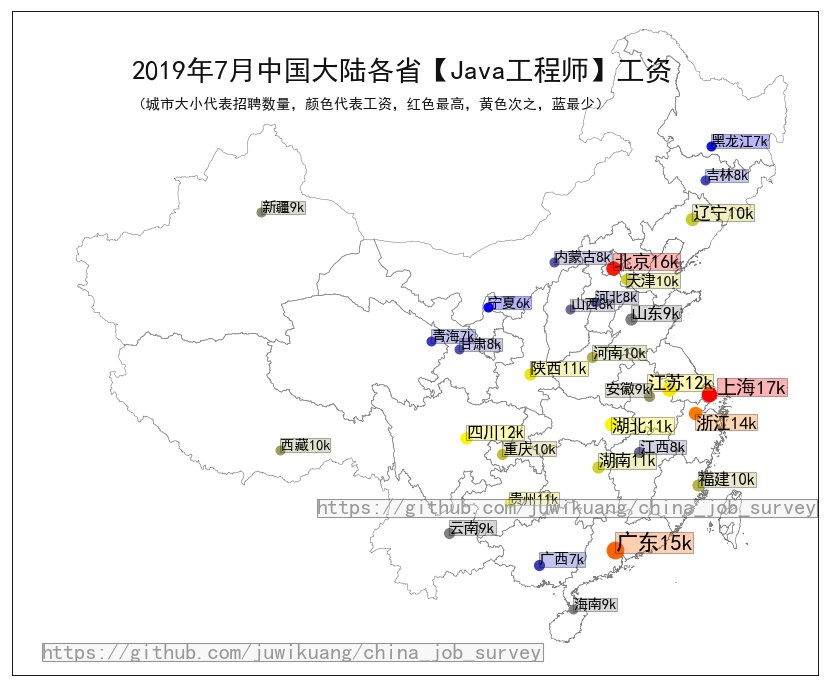

In [36]:
draw_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [37]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年7月全国招收Python程序员24108人。2019年7月全国Python程序员平均工资18091元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。



In [38]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22370,4500,20000,45833,3565,14.79%
上海,21135,5250,20000,45833,5043,20.92%
广东,18813,4500,17500,45000,5766,23.92%
浙江,17131,3654,15000,45000,1506,6.25%
四川,16192,4316,15000,37500,1111,4.61%
江苏,15855,4500,15000,35000,2529,10.49%
海南,15800,7500,13750,35000,40,0.17%
湖北,14516,5068,13813,30000,1166,4.84%
辽宁,13116,2099,10499,48633,541,2.24%
天津,13080,5996,11600,25844,133,0.55%


In [39]:
describe(data_python, 'Python程序员')

2019年7月北京招收Python程序员3565人。2019年7月北京Python程序员平均工资22370元，工资中位数20000元，其中95%的人的工资介于4500元到45833元。

2019年7月上海招收Python程序员5043人。2019年7月上海Python程序员平均工资21135元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。

2019年7月广东招收Python程序员5766人。2019年7月广东Python程序员平均工资18813元，工资中位数17500元，其中95%的人的工资介于4500元到45000元。

2019年7月浙江招收Python程序员1506人。2019年7月浙江Python程序员平均工资17131元，工资中位数15000元，其中95%的人的工资介于3654元到45000元。

2019年7月四川招收Python程序员1111人。2019年7月四川Python程序员平均工资16192元，工资中位数15000元，其中95%的人的工资介于4316元到37500元。

2019年7月江苏招收Python程序员2529人。2019年7月江苏Python程序员平均工资15855元，工资中位数15000元，其中95%的人的工资介于4500元到35000元。

2019年7月海南招收Python程序员40人。2019年7月海南Python程序员平均工资15800元，工资中位数13750元，其中95%的人的工资介于7500元到35000元。

2019年7月湖北招收Python程序员1166人。2019年7月湖北Python程序员平均工资14516元，工资中位数13813元，其中95%的人的工资介于5068元到30000元。

2019年7月辽宁招收Python程序员541人。2019年7月辽宁Python程序员平均工资13116元，工资中位数10499元，其中95%的人的工资介于2099元到48633元。

2019年7月天津招收Python程序员133人。2019年7月天津Python程序员平均工资13080元，工资中位数11600元，其中95%的人的工资介于5996元到25844元。

2019年7月湖南招收Python程序员451人。2019年7月湖南Python程序员平均工资12451元，工资中位数12500

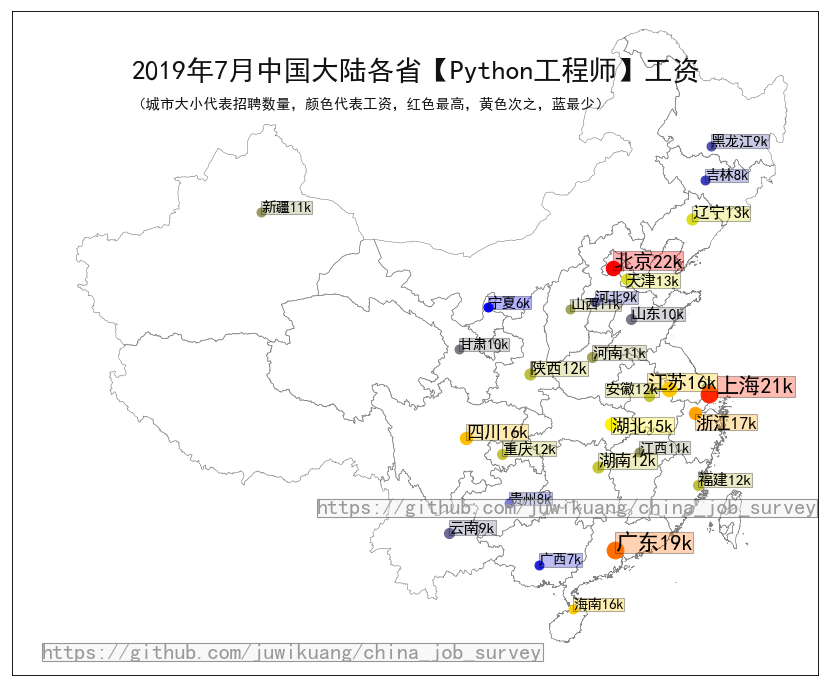

In [40]:
draw_map(data_python, 100,  f'2019年{month}月中国大陆各省【Python工程师】工资')